# Agenda
* Numpy
* Pandas
* Lab


# Introduction


## Create a new notebook for your code-along:

From our submission directory, type:
    
    jupyter notebook

From the Jupyter Dashboard, open a new notebook.
Change the title to: "Numpy and Pandas"

# Introduction to Numpy

* Overview
* ndarray
* Indexing and Slicing

More info: [http://wiki.scipy.org/Tentative_NumPy_Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)


## Numpy Overview

* Why Python for Data? Numpy brings *decades* of C math into Python!
* Numpy provides a wrapper for extensive C/C++/Fortran codebases, used for data analysis functionality
* NDAarray allows easy vectorized math and broadcasting (i.e. functions for vector elements of different shapes)

In [1]:
import numpy as np

### Creating ndarrays

An array object represents a multidimensional, homogeneous array of fixed-size items. 

In [2]:
# Creating arrays
a = np.zeros((3))
b = np.ones((2,3))
c = np.random.randint(1,10,(2,3,4))
d = np.arange(0,11,1)

What are these functions? (use shift-tab to find out...)

    arange?

In [3]:
# Note the way each array is printed:
a,b,c,d

(array([0., 0., 0.]), array([[1., 1., 1.],
        [1., 1., 1.]]), array([[[2, 7, 4, 8],
         [4, 2, 5, 2],
         [1, 9, 5, 2]],
 
        [[1, 5, 8, 1],
         [9, 7, 2, 5],
         [1, 2, 3, 7]]]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [ ]:
## Arithmetic in arrays is element wise

In [4]:
a = np.array( [20,30,40,50] )
b = np.arange( 4 )
b

array([0, 1, 2, 3])

In [5]:
c = a-b
c

array([20, 29, 38, 47])

In [7]:
b**2

array([0, 1, 4, 9])

## Indexing, Slicing and Iterating

In [8]:
# one-dimensional arrays work like lists:
a = np.arange(10)**2

In [9]:
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [11]:
a[2:5]

array([ 4,  9, 16])

In [12]:
# Multidimensional arrays use tuples with commas for indexing
# with (row,column) conventions beginning, as always in Python, from 0

In [15]:
b = np.random.randint(1,100,(5,4))

In [16]:
b

array([[23, 84, 49, 26],
       [24, 35, 29, 68],
       [15, 73, 24, 63],
       [84, 36, 23, 28],
       [82, 93, 93, 40]])

In [17]:
# Guess the output
print(b[2,3])
print(b[0,0])


63
23


In [18]:
b[0:3,1],b[:,1]

(array([84, 35, 73]), array([84, 35, 73, 36, 93]))

In [19]:
b[1:3,:]

array([[24, 35, 29, 68],
       [15, 73, 24, 63]])

# Introduction to Pandas

* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* i/o
 

_pandas.pydata.org_

## Pandas Overview

_Source: [pandas.pydata.org](http://pandas.pydata.org/pandas-docs/stable/10min.html)_

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
dates = pd.date_range('20140101',periods=6, freq='y')
dates

DatetimeIndex(['2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31',
               '2018-12-31', '2019-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [37]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
z = pd.DataFrame(index = df.index, columns = df.columns)
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [25]:
# Index, columns, underlying numpy data
df.T
df

,A,B,C,D
2014-01-01,1.746750,-0.365727,-1.605908,0.866958
2014-01-02,0.248296,1.569577,0.249744,-0.991402
2014-01-03,2.254215,0.757941,0.792300,0.168959
2014-01-04,-1.276016,-0.114634,0.780775,-0.061579
2014-01-05,-0.197354,-0.356933,-1.179002,-0.843328
2014-01-06,0.530412,0.381245,0.618102,-0.514077


In [26]:
df2 = pd.DataFrame({ 'A' : 1.,
                         'B' : pd.Timestamp('20130102'),
                         'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                         'D' : np.array([3] * 4,dtype='int32'),
                         'E' : 'foo' })
    

df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


In [27]:
# With specific dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

#### Viewing Data

In [28]:
df.head()

,A,B,C,D
2014-01-01,1.746750,-0.365727,-1.605908,0.866958
2014-01-02,0.248296,1.569577,0.249744,-0.991402
2014-01-03,2.254215,0.757941,0.792300,0.168959
2014-01-04,-1.276016,-0.114634,0.780775,-0.061579
2014-01-05,-0.197354,-0.356933,-1.179002,-0.843328


In [29]:
df.tail()

,A,B,C,D
2014-01-02,0.248296,1.569577,0.249744,-0.991402
2014-01-03,2.254215,0.757941,0.792300,0.168959
2014-01-04,-1.276016,-0.114634,0.780775,-0.061579
2014-01-05,-0.197354,-0.356933,-1.179002,-0.843328
2014-01-06,0.530412,0.381245,0.618102,-0.514077


In [30]:
df.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [35]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.551051,0.311911,-0.057331,-0.229078
std,1.290026,0.758150,1.061229,0.696771
min,-1.276016,-0.365727,-1.605908,-0.991402
25%,-0.085942,-0.296358,-0.821815,-0.761015
50%,0.389354,0.133305,0.433923,-0.287828
75%,1.442666,0.663767,0.740107,0.111324
max,2.254215,1.569577,0.792300,0.866958


In [44]:
df

,A,B,C,D
2015-12-31,0.163508,-1.136397,-2.375895,1.114507
2014-12-31,-0.427730,-0.068127,0.276113,1.060683
2016-12-31,-0.461230,0.228269,-0.177870,-0.895793
2018-12-31,-0.496293,0.446295,0.881199,-3.392042
2019-12-31,-0.322230,0.747845,0.124412,0.548397
2017-12-31,0.671306,2.818394,-0.521000,0.463570


In [43]:
df = df.sort_values(by='B')

### Selection

In [45]:
df[['A','B']]

,A,B
2015-12-31,0.163508,-1.136397
2014-12-31,-0.427730,-0.068127
2016-12-31,-0.461230,0.228269
2018-12-31,-0.496293,0.446295
2019-12-31,-0.322230,0.747845
2017-12-31,0.671306,2.818394


In [48]:
df[0:3]

,A,B,C,D
2015-12-31,0.163508,-1.136397,-2.375895,1.114507
2014-12-31,-0.427730,-0.068127,0.276113,1.060683
2016-12-31,-0.461230,0.228269,-0.177870,-0.895793


In [47]:
# By label
df.loc[dates[0]]

A   -0.427730
B   -0.068127
C    0.276113
D    1.060683
Name: 2014-12-31 00:00:00, dtype: float64

In [49]:
# multi-axis by label
df.loc[:,['A','B']]

,A,B
2015-12-31,0.163508,-1.136397
2014-12-31,-0.427730,-0.068127
2016-12-31,-0.461230,0.228269
2018-12-31,-0.496293,0.446295
2019-12-31,-0.322230,0.747845
2017-12-31,0.671306,2.818394


In [50]:
# Date Range
df.loc['20140102':'20140104',['B']]

,B


In [51]:
# Fast access to scalar
df.at[dates[1],'B']

-1.1363969467776038

In [52]:
# iloc provides integer locations similar to np style
df.iloc[3:]

,A,B,C,D
2018-12-31,-0.496293,0.446295,0.881199,-3.392042
2019-12-31,-0.322230,0.747845,0.124412,0.548397
2017-12-31,0.671306,2.818394,-0.521000,0.463570


### Boolean Indexing

In [54]:
df[df.A < 0 & df.B>1] # Basically a 'where' operation

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

### Setting

In [55]:
df_posA = df.copy() # Without "copy" it would act on the dataset

df_posA[df_posA.A < 0] = -1*df_posA

In [57]:
df_posA

,A,B,C,D
2015-12-31,0.163508,-1.136397,-2.375895,1.114507
2014-12-31,0.427730,0.068127,-0.276113,-1.060683
2016-12-31,0.461230,-0.228269,0.177870,0.895793
2018-12-31,0.496293,-0.446295,-0.881199,3.392042
2019-12-31,0.322230,-0.747845,-0.124412,-0.548397
2017-12-31,0.671306,2.818394,-0.521000,0.463570


In [58]:
#Setting new column aligns data by index
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20140102',periods=6))

In [59]:
s1

2014-01-02    1
2014-01-03    2
2014-01-04    3
2014-01-05    4
2014-01-06    5
2014-01-07    6
Freq: D, dtype: int64

In [60]:
df['F'] = s1

In [ ]:
df

### Missing Data

In [ ]:
# Add a column with missing data
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])

In [ ]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [ ]:
df1

In [ ]:
# find where values are null
pd.isnull(df1)

### Operations

In [ ]:
df.describe()

In [ ]:
df.mean(),df.mean(1) # Operation on two different axes

### Applying functions

In [61]:
df

,A,B,C,D,F
2015-12-31,0.163508,-1.136397,-2.375895,1.114507,NaN
2014-12-31,-0.427730,-0.068127,0.276113,1.060683,NaN
2016-12-31,-0.461230,0.228269,-0.177870,-0.895793,NaN
2018-12-31,-0.496293,0.446295,0.881199,-3.392042,NaN
2019-12-31,-0.322230,0.747845,0.124412,0.548397,NaN
2017-12-31,0.671306,2.818394,-0.521000,0.463570,NaN


In [62]:
df.apply(np.cumsum)

,A,B,C,D,F
2015-12-31,0.163508,-1.136397,-2.375895,1.114507,NaN
2014-12-31,-0.264222,-1.204524,-2.099783,2.175190,NaN
2016-12-31,-0.725452,-0.976255,-2.277652,1.279397,NaN
2018-12-31,-1.221745,-0.529960,-1.396453,-2.112645,NaN
2019-12-31,-1.543976,0.217885,-1.272041,-1.564248,NaN
2017-12-31,-0.872670,3.036278,-1.793041,-1.100678,NaN


Anonymous functions work, too...

In [ ]:
df.apply(lambda x: x.max() - x.min())

In [ ]:
# Built in string methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

### Merge

In [ ]:
np.random.randn(10,4)

In [ ]:
#Concatenating pandas objects together
df = pd.DataFrame(np.random.randn(10,4))
df

In [ ]:
# Break it into pieces
pieces = [df[:3], df[3:7],df[7:]]
pieces

In [ ]:
pd.concat(pieces)

In [ ]:
# Also can "Join" and "Append"
df

### Grouping


In [63]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})

In [64]:
df

,A,B,C,D
0,foo,one,0.831933,1.309607
1,bar,one,-1.193589,-2.120447
2,foo,two,0.193872,1.711015
3,bar,three,0.874889,0.184627
4,foo,two,-0.593101,2.768110
5,bar,two,-1.959820,0.381667
6,foo,one,0.476453,0.485796
7,foo,three,0.850134,-1.101904


In [65]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.193589 -2.120447
    three  0.874889  0.184627
    two   -1.959820  0.381667
foo one    1.308386  1.795403
    three  0.850134 -1.101904
    two   -0.399229  4.479125

### Reshaping

In [ ]:
# You can also stack or unstack levels

In [ ]:
a = df.groupby(['A','B']).sum()

A pivot table is a table that summarizes data in another table, and is made by applying an operation such as sorting, averaging, or summing to data in the first table, typically including grouping of the data. 

In [ ]:
# Pivot Tables
pd.pivot_table(df,values=['C','D'],index=['A'],columns=['B'])

### Time Series


In [66]:
import pandas as pd
import numpy as np

In [67]:
# 100 Seconds starting on January 1st
rng = pd.date_range('1/1/2014', periods=100, freq='S')

In [68]:
# Give each second a random value
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [69]:
ts

2014-01-01 00:00:00     22
2014-01-01 00:00:01    288
2014-01-01 00:00:02     91
2014-01-01 00:00:03    174
2014-01-01 00:00:04    132
2014-01-01 00:00:05    115
2014-01-01 00:00:06    159
2014-01-01 00:00:07    150
2014-01-01 00:00:08     62
2014-01-01 00:00:09    193
2014-01-01 00:00:10    351
2014-01-01 00:00:11    250
2014-01-01 00:00:12    138
2014-01-01 00:00:13    388
2014-01-01 00:00:14     14
2014-01-01 00:00:15     97
2014-01-01 00:00:16    205
2014-01-01 00:00:17     47
2014-01-01 00:00:18    384
2014-01-01 00:00:19    193
2014-01-01 00:00:20    455
2014-01-01 00:00:21    483
2014-01-01 00:00:22    338
2014-01-01 00:00:23    423
2014-01-01 00:00:24    259
2014-01-01 00:00:25    473
2014-01-01 00:00:26    210
2014-01-01 00:00:27    301
2014-01-01 00:00:28    271
2014-01-01 00:00:29    219
                      ... 
2014-01-01 00:01:10     71
2014-01-01 00:01:11    221
2014-01-01 00:01:12    102
2014-01-01 00:01:13    436
2014-01-01 00:01:14    197
2014-01-01 00:01:15    195
2

In [70]:
# Built in resampling
ts.resample('1Min').mean() # Resample secondly to 1Minutely

2014-01-01 00:00:00    229.516667
2014-01-01 00:01:00    212.250000
Freq: T, dtype: float64

In [71]:
# Many additional time series features
ts. #use tab

SyntaxError: invalid syntax (<ipython-input-71-5c9240a56f62>, line 2)

### Plotting


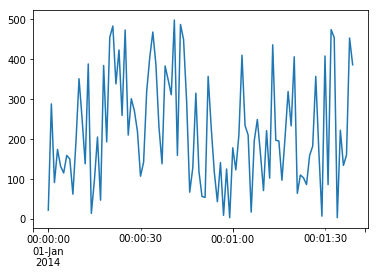

In [72]:
ts.plot()

In [73]:
def randwalk(startdate,points):
    ts = pd.Series(np.random.randn(points), index=pd.date_range(startdate, periods=points))
    ts=ts.cumsum()
    ts.plot()
    return(ts)

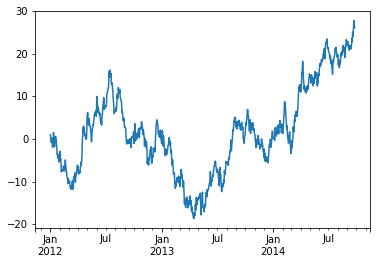

In [74]:
# Using pandas to make a simple random walker by repeatedly running:
a=randwalk('1/1/2012',1000)

In [75]:
# Pandas plot function will print with labels as default

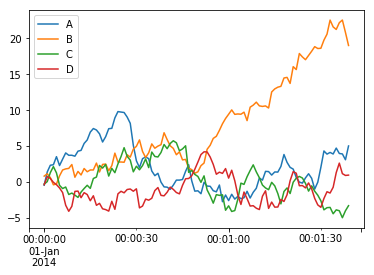

In [76]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure();df.plot();plt.legend(loc='best') #

### I/O
I/O is straightforward with, for example, pd.read_csv or df.to_csv

# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/10min.html) | Wes & Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with examples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas